## PROBNLEM STATEMENT

**Safe Travel Insurance Inc. specializes in risk management by approving customers claim.**

## ABOUT THE DATA

The dataset has details of 52310 train and 22421 test dataest with the following 11 features

## Columns

- Target: Claim Status (Claim)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- The commission received for travel insurance agency (Commission)
- Age of insured (Age)
- The identification record of every observation (ID)

**Business Overview**
SafeTravels is world’s largest insurance companies specializing in travel insurance

**Potential Customers** - Travelers wanting to insure themselves against travel related risks

**Offerings** - 1-way travel insurance, 2-way insurance, insurance against cancellations, renting vehicles insurance, etc.

**Problem Statement**
Building an ML model to predict whether the customer will apply for the claim or not
Core Business Problem being solved?
Building an ML model to predict whether the customer will apply for the claim or not
1000s of claims spread across different products are received weekly thereby increasing manual effort and time
Automatically predicting the claims could lead less effort, time and operational costs
Whenever a claim is registered and if accepted it is a cost to the company

## Why solve this project ?

# Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import mode 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading file into df
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

# Gaining basic Insights from the data and Data Cleansing

In [3]:
#Reading the top 5 rows of the dataset
df_train.head(5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
#Reading the below 5 rows of the dataset
df_train.tail(5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52306,5282,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0
52309,4791,C2B,Airlines,Online,Annual Silver Plan,414,SINGAPORE,216.000000,54.0000,41,0


In [5]:
#Checking the dimensions of the dataset
df_train.shape

(52310, 11)

## Check for null values and get a summary of all the columns in the dataset

In [6]:
df_train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

**As there is no missing values in columns, we are good to go!!**

In [7]:
#Checking datatypes
df_train.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
Claim                     int64
dtype: object

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [9]:
#Ananlysing basic statistical details
df_train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


It can be seen that there are no null values in any of the columns. So it is a pretty clean dataset.<br/>

**Duration**: Min = -2 Max = 4881 But can insurance company giving insurance for 4881 days?
Insurance company do not give insurance over 360 days. Further extension will be provided for 180 days. we are considering 540 days as a limit.

**Age**. Min = 0 Max = 118 age 0 can be possible but 118 too old however we need to check too old people gets insurance or not. So,Insurance Companies do not give insurance over an age of 85.However there are few who provide insurance upto age of 99. so we treat the values above 100.

We have negative values in this Duration column but can time be negative? 

This is due to timezone difference. for ex: 12:10 AM 18/3/2021 you tavelled by a flight which is one way and reached some other country where the timezone is now 11:50 PM 17/3/2021.

In this case they will try to store the duration value as -1 in the database.

**Net sales** can't be negative. so removing those records.

## For further analysis split to bring all the continuous variables together and categorical variables together

In [10]:
# Seperate continuous variables and categorical variables
dataframe_con = df_train.select_dtypes(include=np.number)
dataframe_cat = df_train.select_dtypes(exclude=np.number)

In [11]:
print(dataframe_con.columns)

Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim'], dtype='object')


In [12]:
print(dataframe_cat.columns)

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')


**5 Columns are Categorical and 6 Columns are Numerical**

## Agency Type Vs Claim

<Figure size 720x576 with 0 Axes>

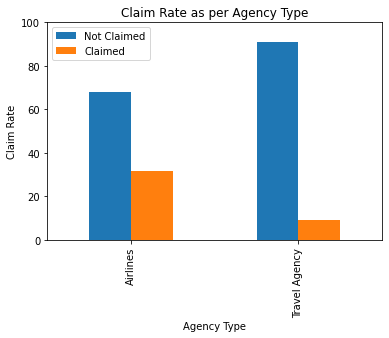

In [13]:
#plotting the graph fpr claim rate vs Agency Type
plt.figure(figsize=(10,8))
agencytype = pd.DataFrame(df_train.groupby(['Agency Type'])['Claim'].value_counts(normalize=True)*100) #converting claim counts grouped by agency type to percentage
agencytype.columns = ['Claim_Rate']  #replacing the claim colum with claim rate
ax = agencytype.unstack().plot(kind = 'bar')
    
plt.ylabel("Claim Rate")
plt.title("Claim Rate as per Agency Type")
plt.legend(['Not Claimed', 'Claimed'], loc = 'upper left')
plt.ylim(0,100)
plt.show()

**Insights and Recommendation**

- Airlines agency has higher claimed rates (34%-36%) less than Travel agency claim rates (9%-10%)

## Agency vs Claim

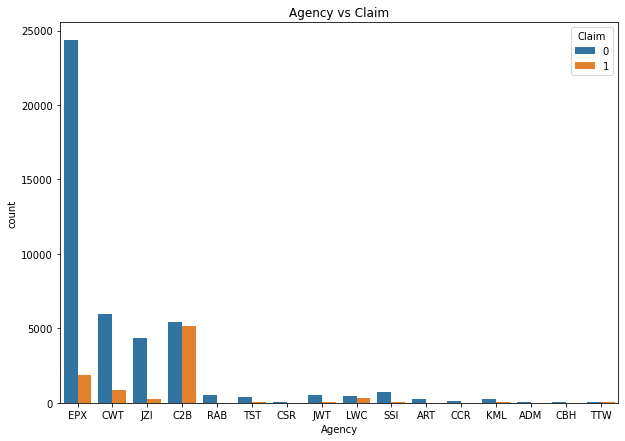

In [14]:
plt.figure(figsize=(10,7))
tl= df_train
sns.countplot('Agency', hue='Claim', data=df_train)
plt.title('Agency vs Claim')

plt.show()

**Insights and Recommandation**

- Top 5 Ageny companies have better claim rate

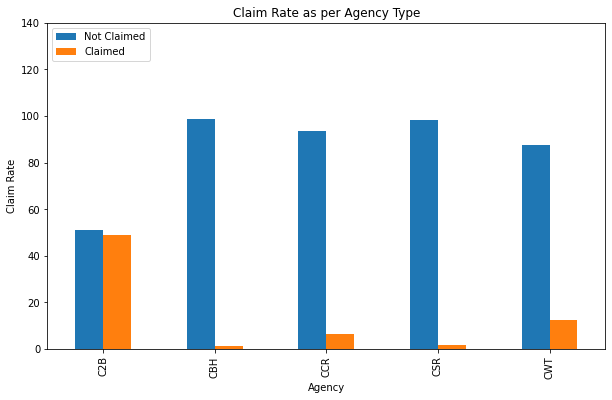

In [15]:
agency = pd.DataFrame(df_train.groupby(['Agency'])['Claim'].value_counts(normalize = True)*100)[2:12] #converting claim counts grouped by agency type to percentage
agency.columns = ['Claim_Rate']
ax = agency.unstack().plot(kind ='bar',figsize =(10,6))
    
plt.ylabel("Claim Rate")
plt.title("Claim Rate as per Agency Type")
plt.legend(['Not Claimed', 'Claimed'], loc = 'upper left')
plt.ylim(0,140)
plt.show()

**Insights and Recommandation**

Top 5 Ageny companies - C2B have better claiming rate and CWT next

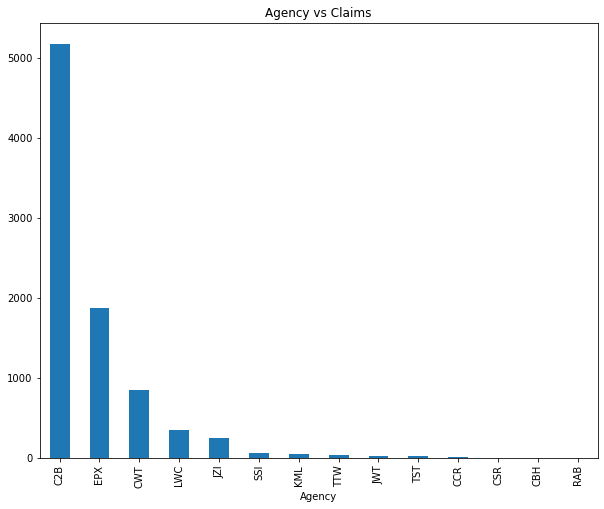

In [16]:
#Agency vs Claim registered
plt.figure(figsize=(10,8))
claimed=df_train[df_train['Claim']==1]
claimed['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Agency vs Claims')
plt.xlabel('Agency')
plt.show()

**Insights and Recommandation**

C2B have highest claim rate

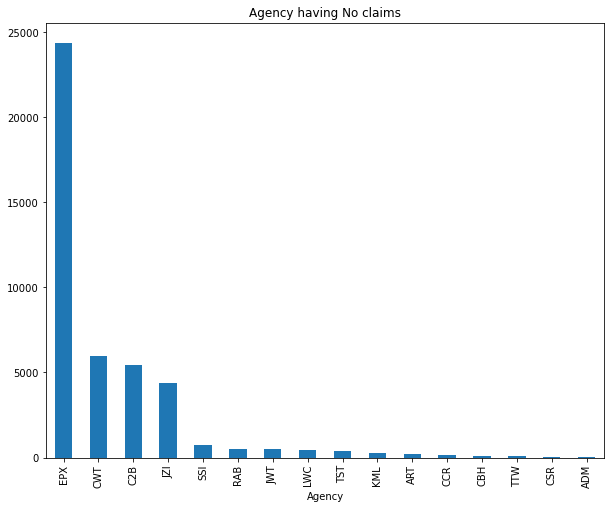

In [17]:
#When no claims
plt.figure(figsize=(10,8))
unclaim=df_train[df_train['Claim']==0]     # condition when claim is zero
unclaim['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Agency having No claims')
plt.xlabel('Agency')
plt.show()

**Insights and Recommandation**

EPX have lowest claim rate

## AGENCY VS PRODUCT NAME

<Figure size 720x576 with 0 Axes>

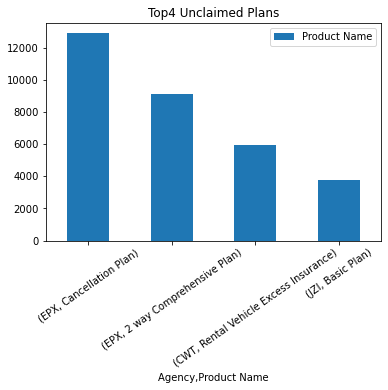

In [18]:
#plotting graph with for unclaimed products of an agency from high to low
plt.figure(figsize=(10,8))
pd.DataFrame(unclaim.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:4].plot(kind='bar')
plt.xticks(rotation=35)
plt.title('Top4 Unclaimed Plans')
plt.show()

**Insights and Recommandation**

EPX, CWT, JZT AGENCY have zero claim with product name of Cancellation plan, Comprehensive plan, Rental vehicle excess insurance, Basic plan 

<Figure size 720x576 with 0 Axes>

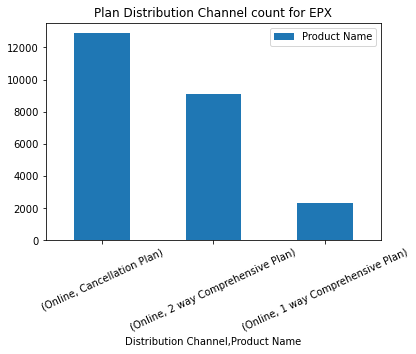

In [19]:
#plotting graph for EPX when no claims received
plt.figure(figsize=(10,8))
unclaim_distribution = unclaim[unclaim['Agency']=='EPX']
pd.DataFrame(unclaim_distribution.groupby(['Distribution Channel'])['Product Name'].value_counts().sort_values(ascending=False))[:3].plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Plan Distribution Channel count for EPX')
plt.show()

By taking no claim agency EPX AND parallely checking with the distribution channel

<Figure size 720x576 with 0 Axes>

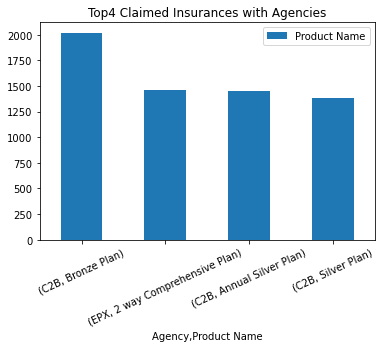

In [20]:
#plotting top4 Claimed Insurances with Agencies
plt.figure(figsize=(10,8))
pd.DataFrame(claimed.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:4].plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Top4 Claimed Insurances with Agencies')
plt.show()

**Insights and Recommendations Insights**
- Unclaimed Mostly unclaimed insurances are from Travel Agencies like EPX and C2B forinsurances such as cancellation plan,2-way Comprehensive Plan and Rental Vehicle Excess. Online insurances like cancellation plan,2-way Comprehensive Plan are mostly unclaimed in EPX Recommendations Unclaimed Such plans should be targeted extensively on OTA as well as on our website extensively. Insights Claimed

- C2B has maximum claims registered for Bronze and Annual Silver Plan followed by EPX in 2 way Comprehensive and Silver Plan - Recommendations Claimed

- We should increase the premium of these Plans Automate the process with less overhead and overlay

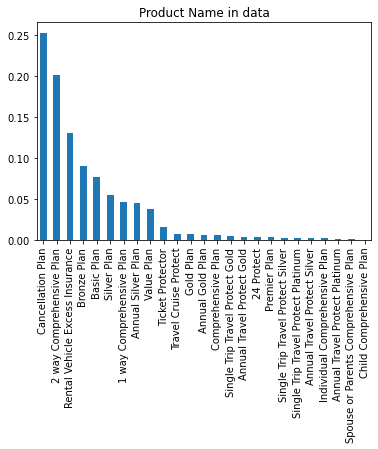

In [21]:
df_train['Product Name'].value_counts(normalize = True).plot(kind = 'bar')

plt.title("Product Name in data")

plt.show()

In [22]:
plt.figure(figsize=(10,8))
#Product Name with claims count and percentage
pc_counts = pd.DataFrame(df_train.groupby(["Product Name"])["Claim"].value_counts())
pc_percent = pd.DataFrame(df_train.groupby(["Product Name"])["Claim"].value_counts(normalize=True)*100)
pc_counts.columns = ['Claim_counts']
pc_percent.columns = ['Claim_percent']
pc_percent

Claim_percent
Product Name                         Claim               
1 way Comprehensive Plan             0          97.177252
                                     1           2.822748
2 way Comprehensive Plan             0          86.196116
                                     1          13.803884
24 Protect                           0         100.000000
Annual Gold Plan                     1          58.305085
                                     0          41.694915
Annual Silver Plan                   1          61.797274
                                     0          38.202726
Annual Travel Protect Gold           1          65.573770
                                     0          34.426230
Annual Travel Protect Platinum       0          72.000000
                                     1          28.000000
Annual Travel Protect Silver         0          66.304348
                                     1          33.695652
Basic Plan                           0          93.913904
                                     1           6.086096
Bronze Plan                          0          57.230574
                                     1          42.769426
Cancellation Plan                    0          97.321563
                                     1           2.678437
Child Comprehensive Plan             0         100.000000
Comprehensive Plan                   0          95.683453
                                     1           4.316547
Gold Plan                            0          62.368421
                                     1          37.631579
Individual Comprehensive Plan        0          55.952381
                                     1          44.047619
Premier Plan                         0          98.581560
                                     1           1.418440
Rental Vehicle Excess Insurance      0          87.553207
                                     1          12.446793
Silver Plan                          0          51.642208
                                     1          48.357792
Single Trip Travel Protect Gold      0          51.792829
                                     1          48.207171
Single Trip Travel Protect Platinum  0          50.000000
                                     1          50.000000
Single Trip Travel Protect Silver    0          87.692308
                                     1          12.307692
Spouse or Parents Comprehensive Plan 0          91.666667
                                     1           8.333333
Ticket Protector                     0          92.692308
                                     1           7.307692
Travel Cruise Protect                0          94.670051
                                     1           5.329949
Value Plan                           0          95.206527
                                     1           4.793473

<Figure size 720x576 with 0 Axes>

In [23]:
pc_percent_ri = pc_percent.copy()
pc_percent_ri.reset_index(inplace=True) # resetting index
pc_counts_ri = pc_counts.copy()
pc_counts_ri.reset_index(inplace=True)

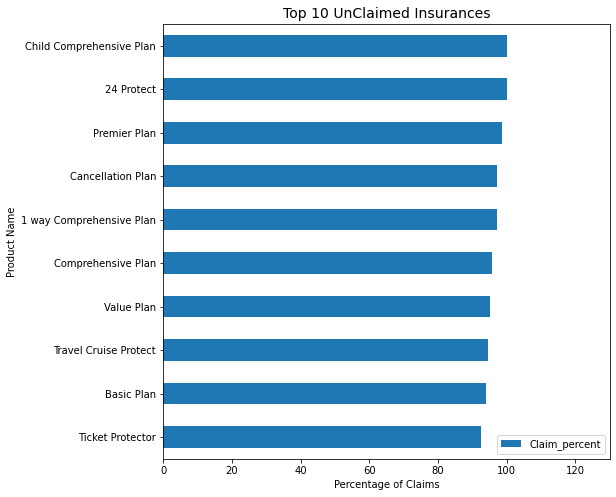

In [24]:
#plotting for Top 10 UnClaimed Insurances

top10_products_c0=pc_percent_ri[pc_percent_ri['Claim']==0].sort_values(by='Claim_percent',ascending =False)[:10]
top10_products_c0 = top10_products_c0.sort_values('Claim_percent')


ax = top10_products_c0.drop('Claim',axis=1).set_index('Product Name').plot(kind='barh',figsize=(8,8))
plt.title('Top 10 UnClaimed Insurances',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')
plt.legend(loc = 'lower right')
plt.xlim((0,130))
    
plt.show()

**Insights**

Checked for unclaimed product name - child comprehensive plan, 24 protest...
and all the top 10 are unclaimed with percentage of more then 90

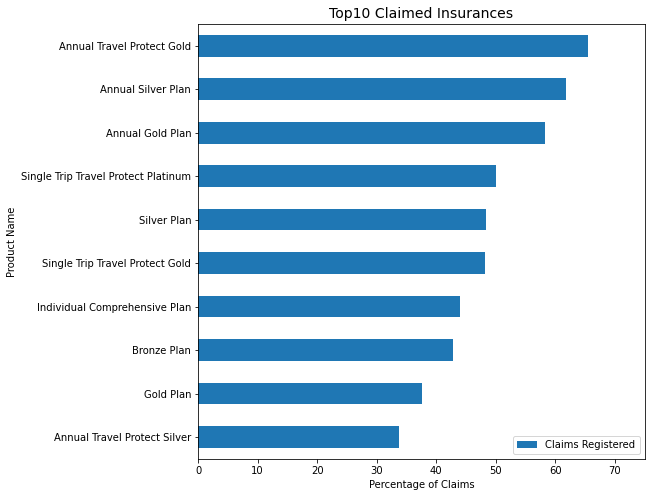

In [25]:
#Plotting for Top10 Claimed Insurances
top10_products_c1 = pc_percent_ri[pc_percent_ri['Claim']==1].sort_values(by='Claim_percent',ascending=False)[:10]
top10_products_c1 = top10_products_c1.sort_values('Claim_percent')

ax = top10_products_c1.drop('Claim',axis=1).set_index('Product Name').plot(kind='barh',figsize=(8,8))
plt.title('Top10 Claimed Insurances',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')
plt.legend(['Claims Registered'])
plt.xlim((0,75))

plt.show()

**Insights and recommendations -Insights**

- Top 10 unclaimed insurances are more than 97% times unclaimed.
- Annual Gold, Silver and Travel protect Gold plan are claimed more than 50% -Recommendations

- Premiums of Annual Plans can be increased

## Net Sale vs Product Name

Text(0.5, 1.0, 'PN VS NS[BOX PLOT] ')

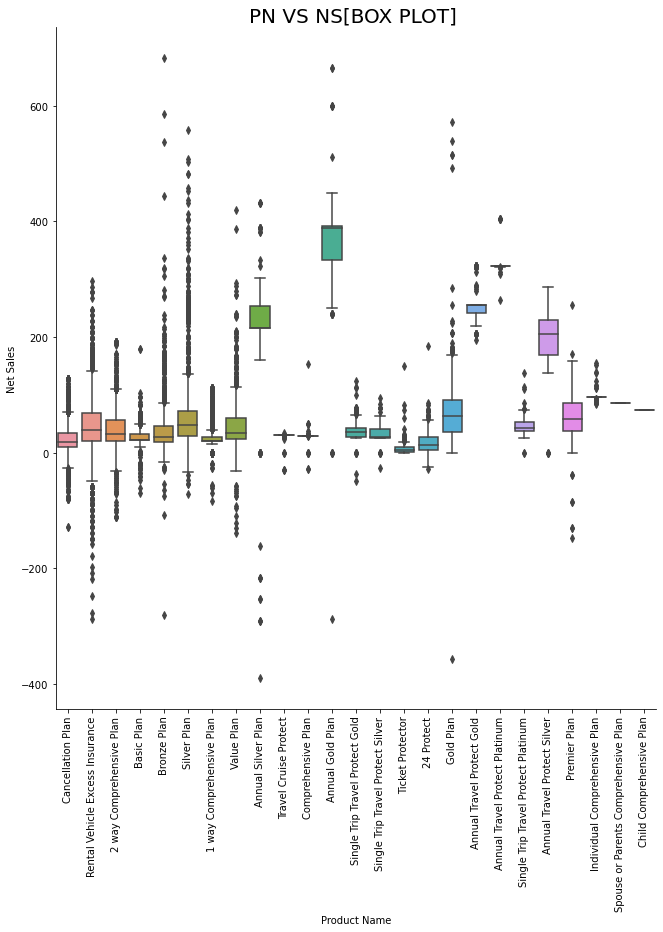

In [26]:
cat = sns.catplot(x='Product Name', y='Net Sales', data=df_train, kind='box', height=10)
cat.set_xticklabels(rotation=90)
plt.title('PN VS NS[BOX PLOT] ', size = 20)

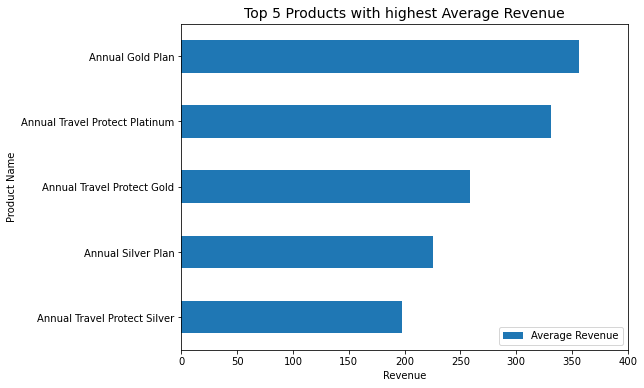

In [27]:
#top 5 products by mean of net sales ---- FINAL

net_sales_top5_mean = df_train.groupby(["Product Name"])[["Net Sales"]].mean().sort_values("Net Sales", ascending = False).iloc[:5]

#plotting top 5 products by mean of net sales

ax = net_sales_top5_mean.sort_values('Net Sales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Average Revenue',fontdict={'fontsize':14})
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.legend(['Average Revenue'])
plt.xlim((0,400))

plt.show()

**Insights**

- Average Net Sales for Annul Gold Plan is highes

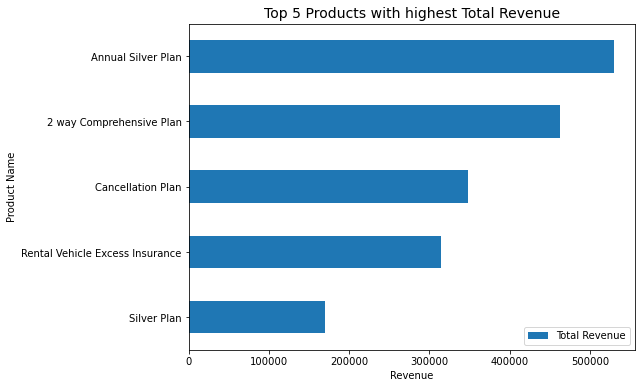

In [28]:
#top 5 products by sum of net sales

net_sales_top5_sum = df_train.groupby(["Product Name"])[["Net Sales"]].sum().sort_values("Net Sales", ascending = False).iloc[:5]
net_sales_top5_sum

#plotting top 5 products by sum of net sales
net_sales_top5_sum.sort_values('Net Sales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Revenue',fontdict={'fontsize':14})
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.legend(['Total Revenue'])

plt.show()

In [29]:
# Average commision for top 5 products
comm_top5_mean = df_train.groupby(["Product Name",])[["Commision (in value)"]].mean().sort_values("Commision (in value)",ascending=False)[:5]
comm_top5_mean

,Commision (in value)
Product Name,
Annual Travel Protect Platinum,215.064490
Annual Travel Protect Gold,168.162634
Annual Travel Protect Silver,133.677591
Annual Gold Plan,91.491629
Annual Silver Plan,57.291729


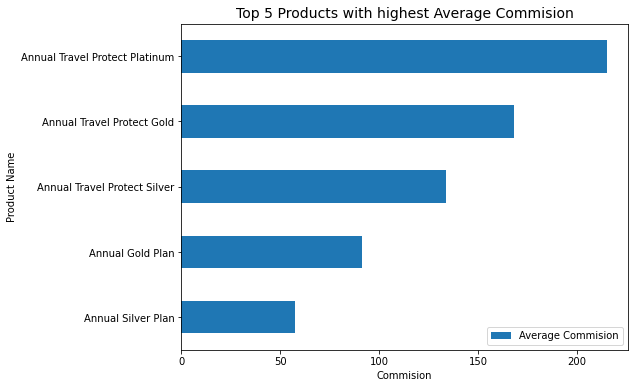

In [30]:
# Plotting for Average commision for top 5 products --FINAL

comm_top5_mean.sort_values('Commision (in value)',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Average Commision',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Average Commision'])
plt.show()

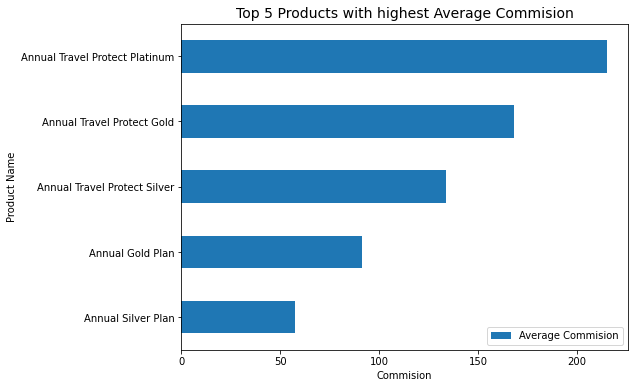

In [31]:
# Plotting for Average commision for top 5 products --FINAL

comm_top5_mean.sort_values('Commision (in value)',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Average Commision',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Average Commision'])
plt.show()

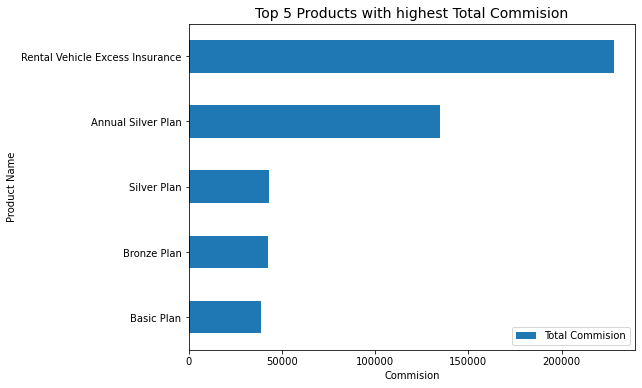

In [32]:
# Plotting for Total commision for top 5 products
comm_top5_sum = df_train.groupby(["Product Name",])[["Commision (in value)"]].sum().sort_values("Commision (in value)",ascending=False)[:5]

comm_top5_sum.sort_values('Commision (in value)',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Commision',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Total Commision'])
plt.show()

**Insights**

- Annual Travel Protect Platinum commision has highest average commission.
- Rental Vehicle Excess Insurance has overall highest commission

In [33]:
df_train.groupby(["Product Name"])[['Net Sales',"Commision (in value)"]].agg(["count","sum","mean"])

Net Sales                             \
                                         count            sum        mean   
Product Name                                                                
1 way Comprehensive Plan                  2409   66253.347009   27.502427   
2 way Comprehensive Plan                 10555  463068.162004   43.871924   
24 Protect                                 165    3389.160000   20.540364   
Annual Gold Plan                           295  105211.774342  356.650083   
Annual Silver Plan                        2348  529705.614727  225.598643   
Annual Travel Protect Gold                 183   47344.266627  258.711839   
Annual Travel Protect Platinum              50   16543.457956  330.869159   
Annual Travel Protect Silver                92   18155.612821  197.343618   
Basic Plan                                4042  107291.844272   26.544246   
Bronze Plan                               4723  166163.651473   35.181802   
Cancellation Plan                        13254  348623.765841   26.303287   
Child Comprehensive Plan                     8     592.000000   74.000000   
Comprehensive Plan                         278    7975.964633   28.690520   
Gold Plan                                  380   28692.242098   75.505900   
Individual Comprehensive Plan               84    8300.837787   98.819497   
Premier Plan                               141    8931.000000   63.340426   
Rental Vehicle Excess Insurance           6813  314100.060080   46.103047   
Silver Plan                               2862  170003.076877   59.400097   
Single Trip Travel Protect Gold            251    9524.137237   37.944770   
Single Trip Travel Protect Platinum        100    4659.139792   46.591398   
Single Trip Travel Protect Silver          130    4467.957908   34.368907   
Spouse or Parents Comprehensive Plan        12    1032.000000   86.000000   
Ticket Protector                           780    5134.452045    6.582631   
Travel Cruise Protect                      394   11532.729697   29.270888   
Value Plan                                1961   93198.693267   47.526106   

                                     Commision (in value)                 \
                                                    count            sum   
Product Name                                                               
1 way Comprehensive Plan                             2409      43.493052   
2 way Comprehensive Plan                            10555     278.217247   
24 Protect                                            165    1258.490000   
Annual Gold Plan                                      295   26990.030566   
Annual Silver Plan                                   2348  134520.980472   
Annual Travel Protect Gold                            183   30773.761967   
Annual Travel Protect Platinum                         50   10753.224492   
Annual Travel Protect Silver                           92   12298.338334   
Basic Plan                                           4042   38768.280844   
Bronze Plan                                          4723   42748.012172   
Cancellation Plan                                   13254      98.026259   
Child Comprehensive Plan                                8       0.000000   
Comprehensive Plan                                    278    2769.423650   
Gold Plan                                             380    7680.681303   
Individual Comprehensive Plan                          84     187.382477   
Premier Plan                                          141    4131.510000   
Rental Vehicle Excess Insurance                      6813  227852.793835   
Silver Plan                                          2862   43360.453712   
Single Trip Travel Protect Gold                       251    6467.598268   
Single Trip Travel Protect Platinum                   100    3091.059272   
Single Trip Travel Protect Silver                     130    3025.380965   
Spouse or Parents Comprehensive Plan                   1

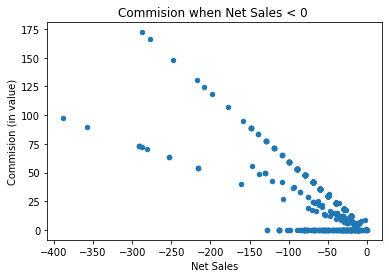

In [34]:
# As there are values less than 0 value

df_train[df_train['Net Sales']<0].plot.scatter(x='Net Sales', y='Commision (in value)')
plt.title('Commision when Net Sales < 0 ')
plt.show()

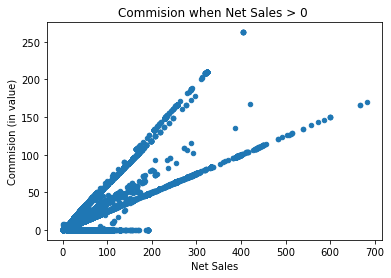

In [35]:
# Net sale Values that are higher than 0 values
df_train[df_train['Net Sales']>0].plot.scatter(x='Net Sales', y='Commision (in value)')
plt.title('Commision when Net Sales > 0 ')
plt.show()

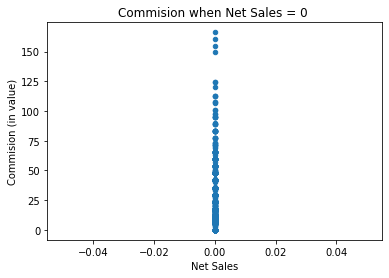

In [36]:
# Net sales that are equal to 0
df_train[df_train['Net Sales']==0].plot.scatter(x='Net Sales', y='Commision (in value)')
plt.title('Commision when Net Sales = 0 ')
plt.show()

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Net Sales'}>],
       [<AxesSubplot:title={'center':'Commision (in value)'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

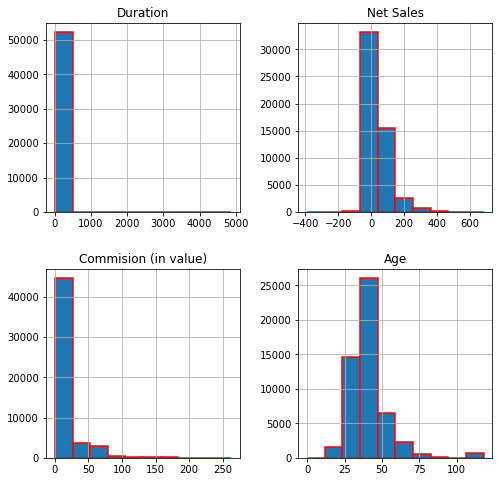

In [37]:
# Corr between attributes
df_train[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].\
hist(edgecolor='red', linewidth=1.5, figsize=(8, 8))

## Destination Analysis

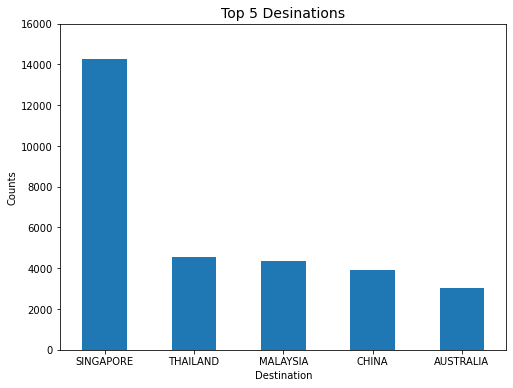

In [38]:
# Destination 
top_5_dest = df_train['Destination'].value_counts()[:5]

top_5_dest.plot.bar(figsize=(8,6))
plt.xlabel("Destination")
plt.ylim((0,16000))
plt.ylabel("Counts")
plt.title('Top 5 Desinations',fontdict={'fontsize':14})
plt.xticks(rotation='horizontal')
plt.show()

**Agency vs Destination**

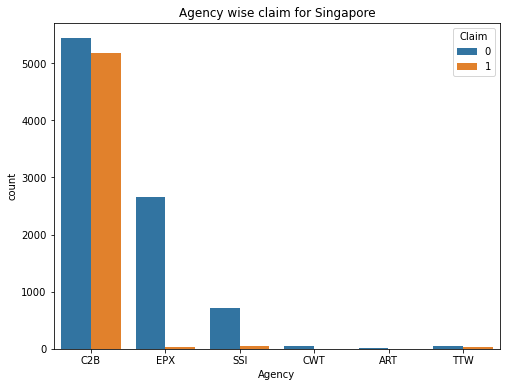

In [39]:
top_country = df_train[df_train['Destination']=='SINGAPORE']
plt.figure(figsize=(8,6))
sns.countplot('Agency', data=top_country, hue='Claim')
plt.title('Agency wise claim for Singapore')
plt.show()

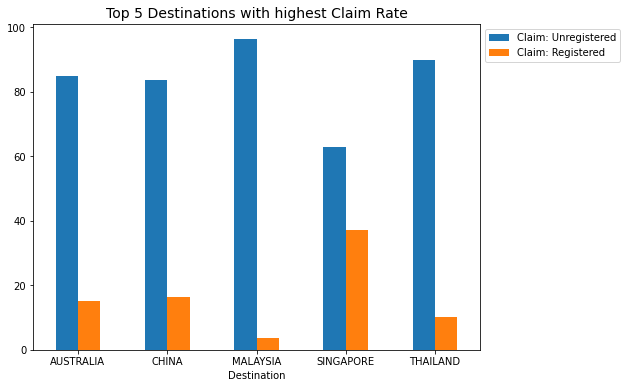

In [40]:
#Final
top_dest = df_train[(df_train['Destination'] == 'SINGAPORE')|
                 (df_train['Destination'] == 'THAILAND')|
                 (df_train['Destination'] == 'MALAYSIA')|
                 (df_train['Destination'] == 'CHINA') |
                 (df_train['Destination'] == 'AUSTRALIA')]
top_dest_claim = top_dest.groupby(["Destination","Claim"])[["Claim"]].count()/top_dest.groupby(["Destination"])[["Claim"]].count()*100
ax = top_dest_claim.unstack().plot.bar(figsize=(8,6))
plt.title('Top 5 Destinations with highest Claim Rate',fontdict={'fontsize':14})
plt.legend(['Claim: Unregistered','Claim: Registered'],bbox_to_anchor=(1,1))
plt.xticks(rotation='horizontal')

plt.show()

**Insights**

We found the highest travel destination with Singapore ....
Taking top country singlore with checking with agency attribute as we found that C2B is the hightest claimed agency
After this we checked with highest destination claim , we found that the singlore is highest claimed

## Age Analysis

Age distribution according to Response


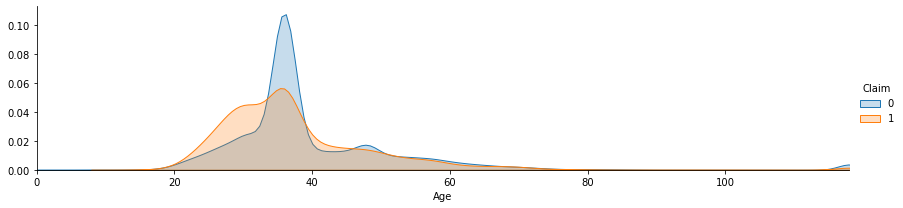

In [41]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df_train,hue="Claim",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,df_train["Age"].max()))
facetgrid.add_legend()
plt.show()

In [42]:
df_train.loc[df_train['Duration'] < 0, 'Duration'] = 33.555171
df_train.loc[df_train['Age'] > 100, 'Age'] = 39.555725

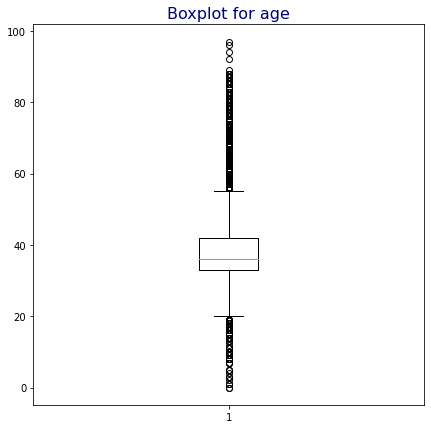

In [43]:
fig = plt.figure(figsize=(7,7))
plt.boxplot(df_train['Age'])
plt.title('Boxplot for age', color='Navy', fontsize=16)
plt.show()

**Insight**

We have more of Outliers belowe 20 and above 60
By this we are knowing that the average age from 20 to maximum 60, so will apply IQR on these outliers to get better results

In [44]:
# # Dividing ages into groups
# df_train["age_bracket"] = pd.cut(df_train['Age'], [0,20,40,60,80,100,120])
# df_train['age_bracket'].value_counts()
# d_i = df_train['age_bracket'].value_counts().index

In [45]:
# # Final
# age_dict = {d_i[0]:"20-40",d_i[1]:"40-60",d_i[2]:"60-80",d_i[3]:"100-120",d_i[4]:"0-20",d_i[5]:"80-1000"}

# age_claims = (df_train.groupby(["age_bracket"])[["Claim"]].count()/len(df_train)*100)
# ax = (df_train.groupby(["age_bracket"])[["Claim"]].count()/len(df_train)*100).plot(kind="bar",figsize=(10,8))
# plt.xlabel("Age group")
# plt.ylabel("Claims")
# plt.title("Age group and Claim Distribution",fontdict={'fontsize':14})
# plt.show()

**Duration - Hypothesis Testing**

(0.0, 0.002)

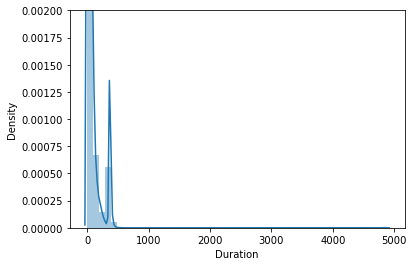

In [46]:
sns.distplot(df_train.Duration)
plt.ylim((0,0.002))

In [47]:
df_train['Duration'].describe()

count    52310.000000
mean        58.258769
std        109.137682
min          0.000000
25%         10.000000
50%         24.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

In [48]:
df_train.drop(df_train[df_train['Duration'].ge(545)].index,axis=0,inplace=True)

**Insights**
- Unit isn't standardized.
- If the units are in days, maximum number is 4881, so that is nearly 13.37 years.
Insights -

1)Negative duration have 4 entries all have age of is 118 plus maximum flight time is 17hrs so removed 4 entries.

2)Duration of each plans are below 1 year. maximum average duration is 384.80 We can keep below durations 4 slots entries: (-6.884, 95.66] 44783 (95.66, 193.32] 3593 (290.98, 388.64] 2859 (193.32, 290.98] 764

3)this below entries Product Nameneeds to check and replace existing duration with average product duration. total 311 entries needs to be corrected

(388.64, 486.3] 290 (486.3, 583.96] 11 (4783.34, 4881.0] 6 (4588.02, 4685.68] 1 (4490.36, 4588.02] 1 (4685.68, 4783.34] 1 (681.62, 779.28] 1

4) Age below 100 is 118 only so removed that entries now max age is 97

4) found same prolem online where they used oversampling and logistic regression get more idea on this will do and check accuracy tomorrow only.

5) As per box plot data insuarance apart from age group 18/19 - 58/59 are outliers. But insuarance for child is avaiable in market also for people above 65 they have to pay premium charges.

In [49]:
#count greather than one year.
greater = df_train[df_train.Duration > 365]
greater.shape

(1954, 11)

In [50]:
#Customers taking more tahn 1 year plans
print(f"People who spent more than an year = {np.round(greater.shape[0]/df_train.shape[0]*100,2)}%")

People who spent more than an year = 3.74%


In [51]:
#count lesser than one year.
lesser = df_train[df_train.Duration < 365]
lesser.shape

(49702, 11)

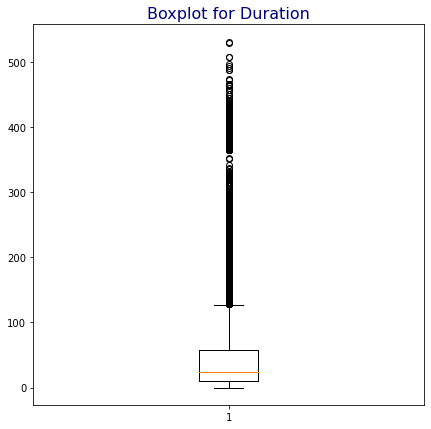

In [52]:
fig = plt.figure(figsize=(7,7))
plt.boxplot(df_train['Duration'])
plt.title('Boxplot for Duration', color='Navy', fontsize=16)
plt.show()

**Insights**

It's clear that the outliers are present above the 4000 (assuming days)

## Get a count of the target variable and note down your observations

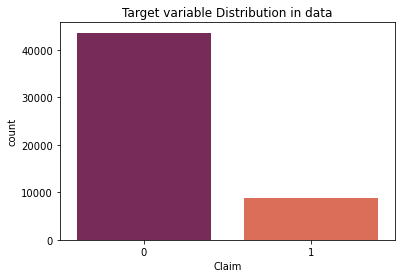

In [53]:
sns.countplot(df_train['Claim'],palette='rocket')
plt.title("Target variable Distribution in data");

**Our data is higly imbalanced data**
- INSIGHT : Data is biased.
- CONCLUSION : ACCURACY IS NOT GOOD METRIC

In [54]:
# pairPlot = sns.pairplot(df_train)

**Insights**

**ID** : Will drop this column as we are not getting any insights from this.<br>
**Age** : Left skewed (between 20 to 60)<br>
**Duration** : Considering plot almost outliers are present after 2000+ <br>
**Net sale** : Right skewed <br>
**Commission** : Right skewed <br>

In [55]:
df_train['Claim'].value_counts()

0    43578
1     8720
Name: Claim, dtype: int64

In [56]:
df_train['Claim'].value_counts(normalize=True).round(5)


0    0.83326
1    0.16674
Name: Claim, dtype: float64

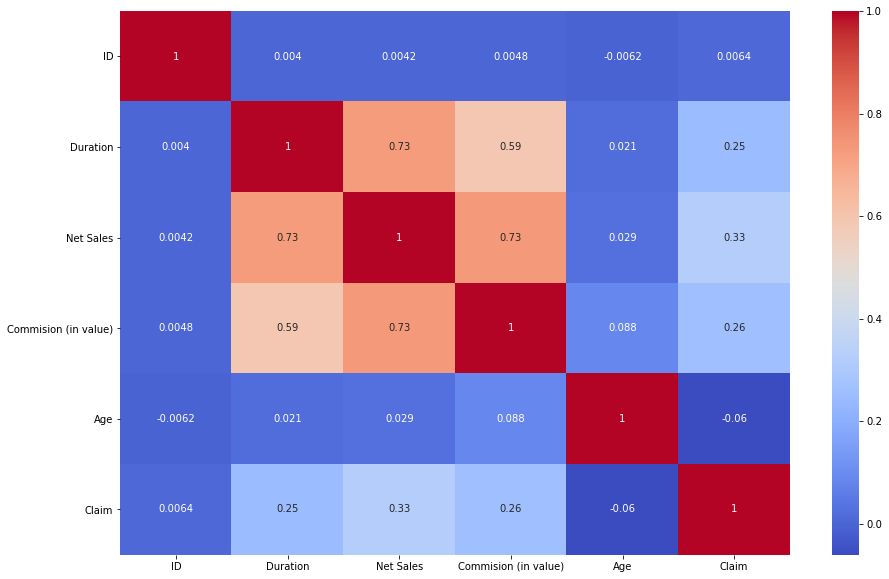

In [57]:
#check coorelation
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')


In [58]:
df_train.corr()['Claim'].sort_values()

Age                    -0.060388
ID                      0.006361
Duration                0.249070
Commision (in value)    0.258729
Net Sales               0.326850
Claim                   1.000000
Name: Claim, dtype: float64

### Check for skewness in the continuous data

In [59]:
from scipy.stats import skew

In [60]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,ID,-0.001854
1,Duration,15.352083
2,Net Sales,2.811757
3,Commision (in value),3.535593
4,Age,2.947807
5,Claim,1.788547


In [61]:
# df_train.drop(['ID'],1,inplace=True)

In [62]:
df_train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52298.000000,52298.000000,52298.000000,52298.000000,52298.000000,52298.000000
mean,6005.918333,57.416292,48.557849,12.219738,38.450200,0.166737
std,2306.537833,89.851340,60.193156,22.847558,10.083023,0.372744
min,2000.000000,0.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,42.000000,0.000000
max,10000.000000,531.000000,682.000000,262.760000,97.000000,1.000000


In [63]:
df_train.head(10)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61.0,PHILIPPINES,12.000000,0.000000,41.0,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4.0,MALAYSIA,17.000000,0.000000,35.0,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,THAILAND,19.800000,11.880000,47.0,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,HONG KONG,27.000000,0.000000,48.0,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,MALAYSIA,37.000000,0.000000,36.0,0
5,5959,EPX,Travel Agency,Online,2 way Comprehensive Plan,4.0,THAILAND,25.000000,0.000000,38.0,0
6,6031,EPX,Travel Agency,Online,Cancellation Plan,215.0,UNITED KINGDOM,59.000000,0.000000,36.0,0
7,8394,JZI,Airlines,Online,Basic Plan,31.0,VIET NAM,22.000000,7.700000,43.0,0
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13.0,CHINA,48.662699,0.000000,36.0,1
9,8054,C2B,Airlines,Online,Bronze Plan,10.0,SINGAPORE,23.258824,5.817294,28.0,1


**FINAL INSIGHTS OF ALL ATTRIBUTES**

1.**ID** : DROPPED <BR>
2.**AGE** : NEED TO TREAT FOR OUTLIERS, CONSIDERING RANGE BETWEEN 20-60 (REFERING BOX PLOT) - continuos <BR>
3.**DURATION** : NEED TO TREAT FOR OUTLIERS (MORE THAN 2000+), ASSUMING NUMBERS ARE IN DAYS WILL THINK OF 360/365DAYS + 180 EXTENDABLE DAYS - numerical <BR>
4.**CLAIM** :  NEED TO TREAT AND IT'S TARGET VALUE, SO NEED TO DROP FROM TRAIN DATA<BR>
5.**PRODUCT NAME** : NEED TO USE ONE HOT ENCODING TO CONVERT CAT TO NUMERICAL ALSO CONSIDERING <BR>
6.**NET SALES** : <BR>
7.**COMMISSION** :<BR>
8.**DESTINATION** : NEED TO USE ONE HOT ENCODING <BR>
9.**AGNECY** :<BR>
10**AGENCY TYPE** :<BR>
11.**DISTRIBUTION CHANNEL**:<BR>


## Feature Engineering

In [64]:
#creating a checkpoint
dfl = df_train.copy()
#dropping Vintage and id columns as suggested by EDA
dfl.drop(['ID','Commision (in value)','Net Sales','Agency','Agency Type','Distribution Channel'],axis=1,inplace=True)
#checking target variable
dfl.Claim.value_counts()

0    43578
1     8720
Name: Claim, dtype: int64

In [65]:
# predictors
X = dfl.drop(['Claim'], axis = 1)

# target variables
y = dfl['Claim']
#X = df1.iloc[:, :

In [66]:
enc=LabelEncoder()
X.loc[:,['Product Name','Destination']]= \
X.loc[:,['Product Name','Destination']].apply(enc.fit_transform)
X.head()

,Product Name,Duration,Destination,Age
0,10,61.0,68,41.0
1,10,4.0,53,35.0
2,16,26.0,84,47.0
3,1,15.0,33,48.0
4,1,15.0,53,36.0


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [68]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(X_test)



In [69]:
print(classification_report(y_test, logisticRegression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8729
           1       0.57      0.14      0.22      1731

    accuracy                           0.84     10460
   macro avg       0.71      0.56      0.57     10460
weighted avg       0.81      0.84      0.80     10460



In [70]:

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}")

Accuracy score is 84.0


In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [72]:
logisticRegression.fit(X_oversample, y_oversample)
Y_predictions = logisticRegression.predict(X_test)
print(accuracy_score(y_test,Y_predictions))
pd.crosstab(y_test,Y_predictions)
print(classification_report(y_test, logisticRegression.predict(X_test)))

0.6769598470363288
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      8729
           1       0.28      0.59      0.38      1731

    accuracy                           0.68     10460
   macro avg       0.59      0.64      0.58     10460
weighted avg       0.79      0.68      0.71     10460



In [73]:
from collections import Counter
print("Before Sampling :",Counter(y_train))
print("After Sampling :",Counter(y_oversample))

Before Sampling : Counter({0: 34849, 1: 6989})
After Sampling : Counter({0: 34849, 1: 34849})


In [74]:
#creating a checkpoint
test_df = df_test.copy()
#dropping Vintage and id columns as suggested by EDA
test_df.drop(['ID','Commision (in value)','Net Sales','Agency','Agency Type','Distribution Channel'],axis=1,inplace=True)
#checking target variable
test_df.head()

,Product Name,Duration,Destination,Age
0,Cancellation Plan,192,HONG KONG,36
1,1 way Comprehensive Plan,2,SINGAPORE,36
2,Bronze Plan,13,SINGAPORE,24
3,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",36
4,Silver Plan,2,SINGAPORE,32


In [75]:
enc=LabelEncoder()
test_df.loc[:,['Product Name','Destination']]= \
test_df.loc[:,['Product Name','Destination']].apply(enc.fit_transform)
test_df.head()

,Product Name,Duration,Destination,Age
0,10,192,33,36
1,0,2,75,36
2,9,13,75,24
3,1,133,82,36
4,17,2,75,32


In [76]:
predictions = logisticRegression.predict(test_df)
len(list(predictions))

22421

In [77]:
 
pd.DataFrame(predictions).to_csv("../submission_file.csv")